## Movie Recommendation System with Python
In this project, I did a basic recommendation system.

Movies will be suggested by similarity with other films. It's actually looks like a "Ok, this movie is great, I understand why it's here, not so special", something like that.

In [1]:
import numpy as np
import pandas as pd

## Data
We're going to use 2 datasets, from kaggle:
   * A dataset of all movies titles and their ids (movies.csv).
   * A dataset of movie ratings (ratings.csv).

In [2]:
# Readings datasets
movie_titles = pd.read_csv('movies.csv')
movie_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
# Combine them together
df = pd.merge(df, movie_titles, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title_x,genres_x,title_y,genres_y
0,1,2,3.5,1112486027,Jumanji (1995),Adventure|Children|Fantasy,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,851527569,Jumanji (1995),Adventure|Children|Fantasy,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,849082742,Jumanji (1995),Adventure|Children|Fantasy,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,835562174,Jumanji (1995),Adventure|Children|Fantasy,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,846509384,Jumanji (1995),Adventure|Children|Fantasy,Jumanji (1995),Adventure|Children|Fantasy


## Exploratory Analysis
Let's explore the data a bit and get a look at some of the best rated movies.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

Let's create a rating dataframe with average rating and number of ratings:

In [9]:
df.groupby('title_x')['rating'].mean().sort_values(ascending=False).head()

title_x
Stealing a Nation (2004)                                 5.0
Human Behavior Experiments, The (2006)                   5.0
Boys Diving, Honolulu (1901)                             5.0
Rigoletto (1993)                                         5.0
Paying the Price: Killing the Children of Iraq (2000)    5.0
Name: rating, dtype: float64

In [10]:
df.groupby('title_x')['rating'].count().sort_values(ascending=False).head()

title_x
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [11]:
ratings = pd.DataFrame(df.groupby('title_x')['rating'].mean())
ratings.head()

,rating
title_x,
"""Great Performances"" Cats (1998)",2.748387
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667
$ (Dollars) (1971),2.833333
$5 a Day (2008),2.871795
$9.99 (2008),3.009091


Setting the number of ratings column:

In [12]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title_x')['rating'].count())
ratings.head()

,rating,num of ratings
title_x,,
"""Great Performances"" Cats (1998)",2.748387,155
#chicagoGirl: The Social Network Takes on a Dictator (2013),3.666667,3
$ (Dollars) (1971),2.833333,24
$5 a Day (2008),2.871795,39
$9.99 (2008),3.009091,55


Vizualizing the number of ratings:

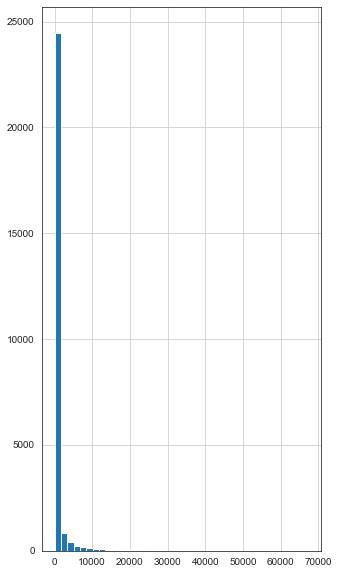

In [24]:
plt.figure(figsize=(5, 10))
ratings['num of ratings'].hist(bins=40)

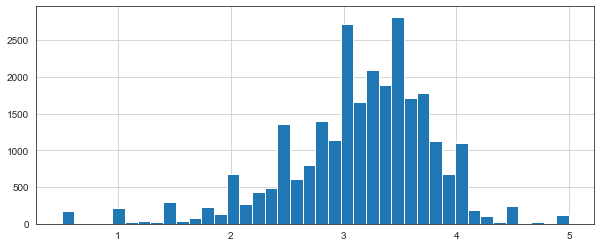

In [25]:
plt.figure(figsize=(10, 4))
ratings['rating'].hist(bins=40)

It makes an intuitive sense for most ratings to be 3 or 3 and a half.